In [23]:
import numpy as np
import pandas as pd
from lsst.rsp import get_tap_service, retrieve_query
import matplotlib.pyplot as plt

In [2]:
from GalaxyFunctions import *

In [3]:
service = get_tap_service("tap")

In [4]:
my_adql_query = "SELECT TOP 10000 "+ \
	"object.objectId as obj_id "+ \
	",object.refExtendedness as extendedness "+ \
	",matches.truth_type as truth_type "+ \
    ",truths.truth_type as truth_type2 "+ \
    ",truths.redshift as true_redshift "+ \
    ",truths.mag_r as true_mag_r "+ \
    "FROM dp02_dc2_catalogs.Object object "+ \
	"JOIN dp02_dc2_catalogs.MatchesTruth matches on object.objectId=matches.match_objectId "+ \
    "JOIN dp02_dc2_catalogs.TruthSummary truths on matches.id_truth_type = truths.id_truth_type"

In [5]:
results = service.search(my_adql_query)
results_table = results.to_table().to_pandas()
results_table

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r
0,1248684569339667465,0.0,1,1,1.199110,26.978800
1,1248684569339662222,0.0,1,1,1.279770,27.351700
2,1248684569339666791,1.0,1,1,1.164180,26.938200
3,1248684569339660119,1.0,1,1,0.788712,27.047701
4,1248684569339662114,0.0,1,1,0.795043,26.892000
...,...,...,...,...,...,...
9995,1248675773246608150,1.0,1,1,0.439385,23.284599
9996,1248675773246608231,1.0,1,1,0.367760,25.447701
9997,1248675773246608130,1.0,1,1,2.601760,26.127300
9998,1248675773246608135,1.0,1,1,0.902256,25.527100


In [6]:
np.count_nonzero((results_table["truth_type"]==results_table["truth_type2"])==True) #just checking!

10000

In [7]:
results_table["galaxy_match"]=galaxy_match(results_table["extendedness"],results_table["truth_type"])

In [8]:
results_table.describe()

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r
count,1.000000e+04,9997.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.248683e+18,0.80024,1.026100,1.026100,1.136279,25.528458
std,3.253945e+12,0.39984,0.159441,0.159441,0.629579,1.373236
min,1.248676e+18,0.00000,1.000000,1.000000,0.000000,12.947800
25%,1.248685e+18,1.00000,1.000000,1.000000,0.717876,24.929124
50%,1.248685e+18,1.00000,1.000000,1.000000,1.022800,25.802250
75%,1.248685e+18,1.00000,1.000000,1.000000,1.505835,26.413325
max,1.248685e+18,1.00000,2.000000,2.000000,3.023360,29.023600


In [10]:
confusion_matrix(results_table["galaxy_match"])

{'true positive %': '79.0%',
 'false positive %': '1.0%',
 'false negative %': '18.4%',
 'true negative %': '1.6%'}

In [14]:
true_galaxies=results_table.loc[(results_table["galaxy_match"]=="true positive") | (results_table["galaxy_match"]=="false negative")]

In [15]:
true_galaxies

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r,galaxy_match
0,1248684569339667465,0.0,1,1,1.199110,26.978800,false negative
1,1248684569339662222,0.0,1,1,1.279770,27.351700,false negative
2,1248684569339666791,1.0,1,1,1.164180,26.938200,true positive
3,1248684569339660119,1.0,1,1,0.788712,27.047701,true positive
4,1248684569339662114,0.0,1,1,0.795043,26.892000,false negative
...,...,...,...,...,...,...,...
9995,1248675773246608150,1.0,1,1,0.439385,23.284599,true positive
9996,1248675773246608231,1.0,1,1,0.367760,25.447701,true positive
9997,1248675773246608130,1.0,1,1,2.601760,26.127300,true positive
9998,1248675773246608135,1.0,1,1,0.902256,25.527100,true positive


In [16]:
np.count_nonzero((results_table["truth_type"]==1)==True)

9739

In [18]:
results_table.loc[((results_table["galaxy_match"]!="true positive") & (results_table["galaxy_match"]!="false negative")) & (results_table["truth_type"]==1)]

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r,galaxy_match
302,1248684569339659470,NaN,1,1,1.09028,27.668800,nan
792,1248684569339659471,NaN,1,1,1.63963,28.911400,nan
6557,1248684569339637266,NaN,1,1,1.76700,26.877501,nan


In [19]:
true_galaxies=results_table.loc[(results_table["truth_type"]==1)]

In [20]:
true_galaxies

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r,galaxy_match
0,1248684569339667465,0.0,1,1,1.199110,26.978800,false negative
1,1248684569339662222,0.0,1,1,1.279770,27.351700,false negative
2,1248684569339666791,1.0,1,1,1.164180,26.938200,true positive
3,1248684569339660119,1.0,1,1,0.788712,27.047701,true positive
4,1248684569339662114,0.0,1,1,0.795043,26.892000,false negative
...,...,...,...,...,...,...,...
9995,1248675773246608150,1.0,1,1,0.439385,23.284599,true positive
9996,1248675773246608231,1.0,1,1,0.367760,25.447701,true positive
9997,1248675773246608130,1.0,1,1,2.601760,26.127300,true positive
9998,1248675773246608135,1.0,1,1,0.902256,25.527100,true positive


In [21]:
identified_galaxies=results_table.loc[(results_table["extendedness"]==1)]

In [22]:
identified_galaxies

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r,galaxy_match
2,1248684569339666791,1.0,1,1,1.164180,26.938200,true positive
3,1248684569339660119,1.0,1,1,0.788712,27.047701,true positive
5,1248684569339659779,1.0,1,1,1.297570,26.950701,true positive
6,1248684569339659562,1.0,1,1,1.300980,26.498699,true positive
9,1248684569339659694,1.0,1,1,0.952824,26.764000,true positive
...,...,...,...,...,...,...,...
9995,1248675773246608150,1.0,1,1,0.439385,23.284599,true positive
9996,1248675773246608231,1.0,1,1,0.367760,25.447701,true positive
9997,1248675773246608130,1.0,1,1,2.601760,26.127300,true positive
9998,1248675773246608135,1.0,1,1,0.902256,25.527100,true positive


(array([ 190.,  460.,  482.,  729.,  957.,  946., 1302.,  979.,  634.,
         698.,  614.,  334.,  369.,  272.,  133.,  134.,  185.,  115.,
         119.,   87.]),
 array([0.0427582 , 0.19178829, 0.34081838, 0.48984846, 0.63887858,
        0.78790867, 0.93693876, 1.08596885, 1.23499894, 1.38402903,
        1.53305912, 1.68208921, 1.8311193 , 1.98014939, 2.12917948,
        2.27820945, 2.42723966, 2.57626963, 2.72529984, 2.87432981,
        3.02336001]),
 <BarContainer object of 20 artists>)

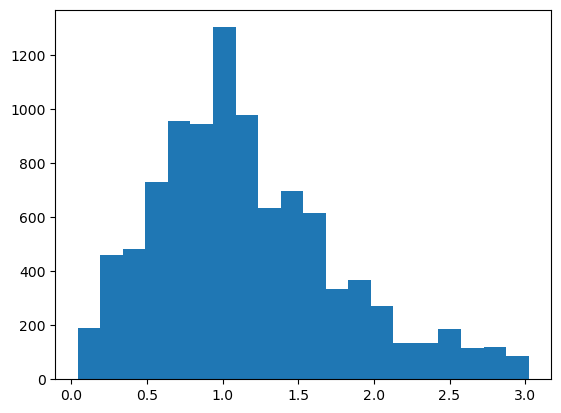

In [25]:
plt.hist(true_galaxies["true_redshift"],20)

(array([ 199.,  349.,  424.,  514.,  758.,  868., 1172.,  629.,  711.,
         514.,  489.,  261.,  265.,  240.,  104.,  106.,  151.,   89.,
          89.,   68.]),
 array([0.        , 0.151168  , 0.30233601, 0.453504  , 0.60467201,
        0.75584   , 0.90700799, 1.05817604, 1.20934403, 1.36051202,
        1.51168001, 1.662848  , 1.81401598, 1.96518397, 2.11635208,
        2.26751995, 2.41868806, 2.56985593, 2.72102404, 2.87219191,
        3.02336001]),
 <BarContainer object of 20 artists>)

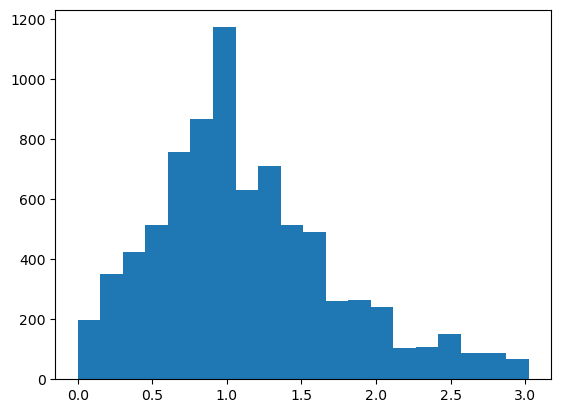

In [26]:
plt.hist(identified_galaxies["true_redshift"],20)

In [27]:
true_galaxies.describe()

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r
count,9.739000e+03,9736.000000,9739.0,9739.0,9739.000000,9739.000000
mean,1.248683e+18,0.811113,1.0,1.0,1.166730,25.586267
std,3.249589e+12,0.391439,0.0,0.0,0.609476,1.267037
min,1.248676e+18,0.000000,1.0,1.0,0.042758,18.294001
25%,1.248685e+18,1.000000,1.0,1.0,0.746669,24.977300
50%,1.248685e+18,1.000000,1.0,1.0,1.047060,25.825300
75%,1.248685e+18,1.000000,1.0,1.0,1.512030,26.421201
max,1.248685e+18,1.000000,1.0,1.0,3.023360,29.023600


In [28]:
identified_galaxies.describe()

,obj_id,extendedness,truth_type,truth_type2,true_redshift,true_mag_r
count,8.000000e+03,8000.0,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.248683e+18,1.0,1.012875,1.012875,1.126787,25.392977
std,3.231009e+12,0.0,0.112742,0.112742,0.616091,1.342824
min,1.248676e+18,1.0,1.000000,1.000000,0.000000,12.947800
25%,1.248685e+18,1.0,1.000000,1.000000,0.706055,24.729276
50%,1.248685e+18,1.0,1.000000,1.000000,1.010840,25.633550
75%,1.248685e+18,1.0,1.000000,1.000000,1.476615,26.295451
max,1.248685e+18,1.0,2.000000,2.000000,3.023360,29.023600


In [29]:
#mean and median redshift are both a bit lower for indentified galaxies than true
#which makes sense as they are more likely to look like points further away

In [37]:
true_galaxies[["extendedness","true_redshift"]].corr()

,extendedness,true_redshift
extendedness,1.00000,-0.08549
true_redshift,-0.08549,1.00000


In [ ]:
#shows that extendness and redshift are inversely correlated for true galaxies
#aka less likely to identify them as galaxies if they are further away

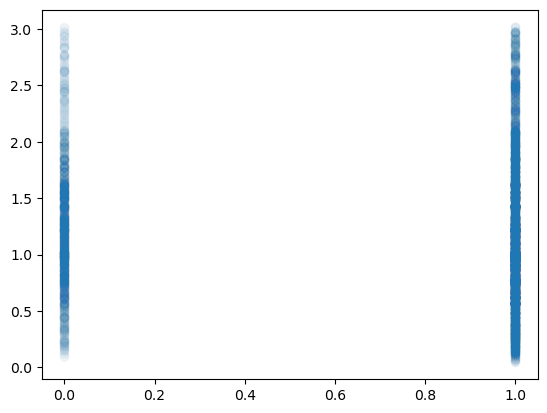

In [38]:
plt.scatter(true_galaxies["extendedness"],true_galaxies["true_redshift"],alpha=0.02)

In [36]:
#visually shows the same thing